In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def load_data():
    data = pd.read_csv("housing_price.csv", index_col=0)
    return data

data = load_data()
print(data.head())
cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
data = data.drop(cols, axis=1)
print(data.head())
data = (data - data.mean())/data.std()

price_mean, price_std = data.mean()[0], data.std()[0]

price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
1  42000.0     5850         3        1        2      yes      no      yes   
2  38500.0     4000         2        1        1      yes      no       no   
3  49500.0     3060         3        1        1      yes      no       no   
4  60500.0     6650         3        1        2      yes     yes       no   
5  61000.0     6360         2        1        1      yes      no       no   

  gashw airco  garagepl prefarea  
1    no    no         1       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no  
5    no    no         0       no  
     price  lotsize  bedrooms  bathrms  stories  garagepl
1  42000.0     5850         3        1        2         1
2  38500.0     4000         2        1        1         0
3  49500.0     3060         3        1        1         0
4  60500.0     6650         3        1        2         0
5  61000.0     6360         2        1    

In [3]:
def train(x, y):
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    # print(X)
    Y = np.array(y)

    XX = X.T.dot(X)
    XY = X.T.dot(Y)

    W = np.linalg.inv(XX).dot(XY)
    return W

In [4]:
def predict(x, W):
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    pred = []
    for t in X:
        pred.append(t.dot(W))
    return np.array(pred)

In [5]:
def err(yy, y):
    diff = yy - y
    return np.sum(np.power(diff, 2))/(2*len(y))

In [6]:
# price_mean, price_std = data.mean()[0], data.std()[0]
x = data.loc[:, data.columns != 'price'].values
print(x.shape)
y = data['price'].values

W = train(x, y)

# print(x[1])
# print(y[1])
# t = np.array([x[1]])
# yy = predict(t, W)
# print(yy[0])
yy = predict(x, W)
norm_err = err(yy, y)
print('Normal Equations Error: {}'.format(norm_err))

(546, 5)
Normal Equations Error: 0.2189327289587085


In [7]:
def gradient_descent(x, y, w=None, epochs=1000, learning_rate=1e-2):
    errs = []
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    if not w:
        w = np.zeros(X.shape[1])
    N = float(len(y))
    for i in range(epochs):
        y_current = (X.dot(w))
        errs.append(err(y_current, y))
        diff = y_current - y
        Z = (X.T.dot(diff))
        w_gradient = (1/N) * Z
        w -= (learning_rate * w_gradient)
    return w, errs

Gradient Descent Error: 0.21893282397493055


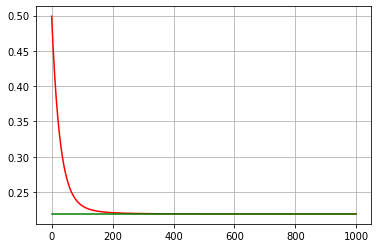

In [8]:
W2, errs = gradient_descent(x, y)
yy = predict(x, W2)
print('Gradient Descent Error: {}'.format(err(yy, y)))

plt.plot(range(len(errs)), errs, '-r')
plt.plot(range(len(errs)), [norm_err]*len(errs), '-g')
plt.grid()
plt.show()